# 解答例：Week1 授業前課題 Pythonを使ってみよう

### 【問題1】べき乗の算術演算子を使用して作成

（解説）

元の紙の厚さを2の43乗倍することで、43回折った厚さが求まります。

In [1]:
THICKNESS = 0.00008

n_folded = 43 # 何回折るかは変数に入れておくと扱いやすい

folded_thickness = THICKNESS*(2**n_folded) # 括弧はなくても良いが、意味を取りやすくするためにつけることもある

print("厚さ： {}メートル".format(folded_thickness))

厚さ： 703687441.77664メートル


【補足】

これだけだと正しく計算できているか分からないため、手計算できる回数に変更して確認してみることをオススメします。

0.00008メートルを一回折ると0.00016メートル、もう一度折ると0.00032メートルであっていそうです。

折る回数を変数で置いて置くと、このような確認が行いやすいです。

In [2]:
n_folded = 1
folded_thickness = THICKNESS*(2**n_folded)
print("回数：{}、厚さ： {}メートル".format(n_folded, folded_thickness))

n_folded = 2
folded_thickness = THICKNESS*(2**n_folded)
print("回数：{}、厚さ： {}メートル".format(n_folded, folded_thickness))

n_folded = 3
folded_thickness = THICKNESS*(2**n_folded)
print("回数：{}、厚さ： {}メートル".format(n_folded, folded_thickness))

回数：1、厚さ： 0.00016メートル
回数：2、厚さ： 0.00032メートル
回数：3、厚さ： 0.00064メートル


### 【問題2】単位の変換

（解説）

メートルを1000で割るとキロメートルですが、さらに10000で割ることで○万キロメートルに変換できます。

In [3]:
THICKNESS = 0.00008

n_folded = 43 # 何回折るかは変数に入れておくと扱いやすい

folded_thickness = THICKNESS*(2**n_folded) # 括弧はなくても良いが、意味を取りやすくするためにつけることもある

print("厚さ： {}メートル".format(folded_thickness))

print("厚さ： {:.2f}万キロメートル".format(folded_thickness/1000/10000))

厚さ： 703687441.77664メートル
厚さ： 70.37万キロメートル


「月までの距離」は検索すると約38万キロメートルと分かるので、43回折った紙は月を超えることが確認できます。

### 【問題3】for文を使用して作成

（解説）

for文を使うことで、2を繰り返し掛けていくことで折った厚さを求めます。43回繰り返すことが43回折ることに相当します。

In [4]:
THICKNESS = 0.00008

n_folded = 43

folded_thickness = THICKNESS
for i in range(n_folded):
    folded_thickness = folded_thickness*2
print("厚さ： {}メートル".format(folded_thickness)) # 問題1と同じ値になることを確認

厚さ： 703687441.77664メートル


【少し違う書き方の例】

rangeは`(0, n_folded, 1)`のように始点やステップ数を明示することもできます。しかし、0はじまり1ステップの場合は省略することが一般的です。

In [5]:
THICKNESS = 0.00008

n_folded = 43

folded_thickness = THICKNESS
for i in range(0, n_folded, 1):
    folded_thickness = folded_thickness*2
print("厚さ： {}メートル".format(folded_thickness)) # 問題1と同じ値になることを確認

厚さ： 703687441.77664メートル


【あまりよくない例】

THICKNESSは定数として扱いたいので、THICKNESSを書き換えるコードは望ましくありません。

Pythonでは全て大文字で表した変数は、変更されることのない定数を表す慣例があります。そう人間が扱っているだけで機能的には普通の変数と同じため、変更してしまうことも可能ですが、そういったコードは分かりにくくなるため避けましょう。

In [6]:
THICKNESS = 0.00008

n_folded = 43

for i in range(n_folded):
    THICKNESS = THICKNESS*2
print("厚さ： {}メートル".format(THICKNESS)) # 問題1と同じ値になることを確認

厚さ： 703687441.77664メートル


### 【問題4】計算時間の比較

（解説）

以下のように記述することで時間が測れます。問題2のように単位を`[s]`から`[ms]`に変換して見やすくしています。

【例1】

問題1と3のコード全体を囲う方法です。

実行する度に順序が入れ替わる程度の差かと思われます。この改善が例2です。

In [7]:
import time
start = time.time()
#####

THICKNESS = 0.00008

n_folded = 43 # 何回折るかは変数に入れておくと扱いやすい

folded_thickness = THICKNESS*(2**n_folded) # 括弧はなくても良いが、意味を取りやすくするためにつけることもある
print("厚さ： {}メートル".format(folded_thickness))
#####
elapsed_time = time.time() - start
print("time : {}[ms]".format(elapsed_time*1000))

厚さ： 703687441.77664メートル
time : 0.3998279571533203[ms]


In [8]:
start = time.time()
#####

THICKNESS = 0.00008

n_folded = 43

folded_thickness = THICKNESS
for i in range(n_folded):
    folded_thickness = folded_thickness*2
print("厚さ： {}メートル".format(folded_thickness)) # 問題1と同じ値になることを確認
#####
elapsed_time = time.time() - start
print("time : {}[ms]".format(elapsed_time*1000))

厚さ： 703687441.77664メートル
time : 1.5101432800292969[ms]


【例2】

問題1と3の異なる部分だけ時間を測る方法です。

print関数の部分はさらに別に時間を計測してみると、ここが紙を折る計算以上に時間がかかっていることが分かります。

べき乗とfor文の部分だけを見ることで、時間の差がはっきりとしてきます。

何回か実行してみると、べき乗の方がやや早そうなことが分かります。書き方もシンプルですし、最終的な結果だけ知りたい場合はべき乗が良さそうです。

In [9]:
THICKNESS = 0.00008

n_folded = 43 # 何回折るかは変数に入れておくと扱いやすい

start = time.time()
#####
folded_thickness = THICKNESS*(2**n_folded) # 括弧はなくても良いが、意味を取りやすくするためにつけることもある
#####
elapsed_time = time.time() - start
print("time : {}[ms]".format(elapsed_time*1000))

time : 0.12993812561035156[ms]


In [10]:
THICKNESS = 0.00008

n_folded = 43

start = time.time()
#####
folded_thickness = THICKNESS
for i in range(n_folded):
    folded_thickness = folded_thickness*2
#####
elapsed_time = time.time() - start
print("time : {}[ms]".format(elapsed_time*1000))

time : 0.1499652862548828[ms]


In [11]:
start = time.time()
#####
print("厚さ： {}メートル".format(folded_thickness)) # 問題1と同じ値になることを確認
#####
elapsed_time = time.time() - start
print("time : {}[ms]".format(elapsed_time*1000))

厚さ： 703687441.77664メートル
time : 0.3190040588378906[ms]


【補足】

「何回か実行してみると」と書きましたが、時間を厳密に計測したい場合は複数回繰り返し平均をとると良いです。

Jupyter Notebookには`%%timeit`と書くことでセル内のコードを複数回実行し、平均の時間を計測する機能が備わっています。

課題としては`time.time()`を使う方法を行ってもらいましたが、今後は`%%timeit`を使うのが便利かと思います。

ここではべき乗はforの約4倍早い結果であることが分かります。`time.time()`を使った場合よりも違いが際立ちます。

＊1000ns = 1µsです。

In [12]:
%%timeit
THICKNESS = 0.00008
n_folded = 43 # 何回折るかは変数に入れておくと扱いやすい
folded_thickness = THICKNESS*(2**n_folded) # 括弧はなくても良いが、意味を取りやすくするためにつけることもある

576 ns ± 14.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [13]:
%%timeit
THICKNESS = 0.00008
n_folded = 43
folded_thickness = THICKNESS
for i in range(n_folded):
    folded_thickness = folded_thickness*2

2.86 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 【問題5】リストへの保存

（解説）

計算結果をリストの最後尾に加えていきます。

`[-1]`で最後尾が指定できるため、これを計算に使っていきます。

In [14]:
THICKNESS = 0.00008

n_folded = 43

folded_thickness_list = [THICKNESS]
for i in range(n_folded):
    folded_thickness_list.append(folded_thickness_list[-1]*2)
print("厚さ： {}メートル".format(folded_thickness_list[-1])) # 問題1と同じ値になることを確認
print("------")
print("リスト")
print(folded_thickness_list)

厚さ： 703687441.77664メートル
------
リスト
[8e-05, 0.00016, 0.00032, 0.00064, 0.00128, 0.00256, 0.00512, 0.01024, 0.02048, 0.04096, 0.08192, 0.16384, 0.32768, 0.65536, 1.31072, 2.62144, 5.24288, 10.48576, 20.97152, 41.94304, 83.88608, 167.77216, 335.54432, 671.08864, 1342.17728, 2684.35456, 5368.70912, 10737.41824, 21474.83648, 42949.67296, 85899.34592, 171798.69184, 343597.38368, 687194.76736, 1374389.53472, 2748779.06944, 5497558.13888, 10995116.27776, 21990232.55552, 43980465.11104, 87960930.22208, 175921860.44416, 351843720.88832, 703687441.77664]


### 【問題6】折れ線グラフの表示

（解説）

正しくリストが作れていれば、`plt.plot()`の引数に渡すだけで表示可能です。

この関数やメソッドの引数はどのような形のものを求めているのか？を考えることが大切です。

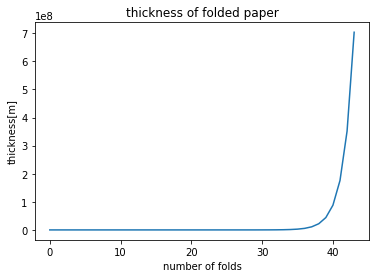

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(folded_thickness_list) # 「リスト名」のところにリストの変数名を入れる
plt.show()

### 【問題7】グラフのカスタマイズ

（解説）

いくつかの例を紹介します。この他にも様々なことが可能です。

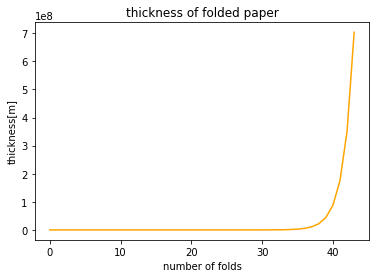

In [16]:
# 線の色を変える

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(folded_thickness_list, color = "orange")
plt.show()

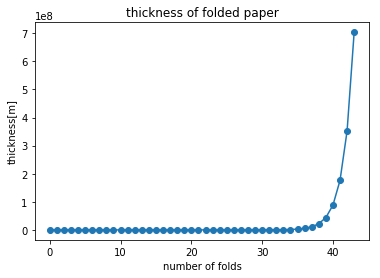

In [17]:
# マーカーを入れる

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.plot(folded_thickness_list, marker='o')
plt.show()

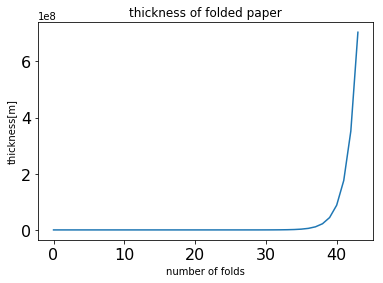

In [18]:
# ラベルの文字を大きくする

plt.title("thickness of folded paper")
plt.xlabel("number of folds")
plt.ylabel("thickness[m]")
plt.tick_params(labelsize=16)
plt.plot(folded_thickness_list)
plt.show()